In [1]:
import numpy as np
import matplotlib.pyplot as plt


Posterior mean: 171.29 cm
95% Credible Interval: [170.49, 172.15]


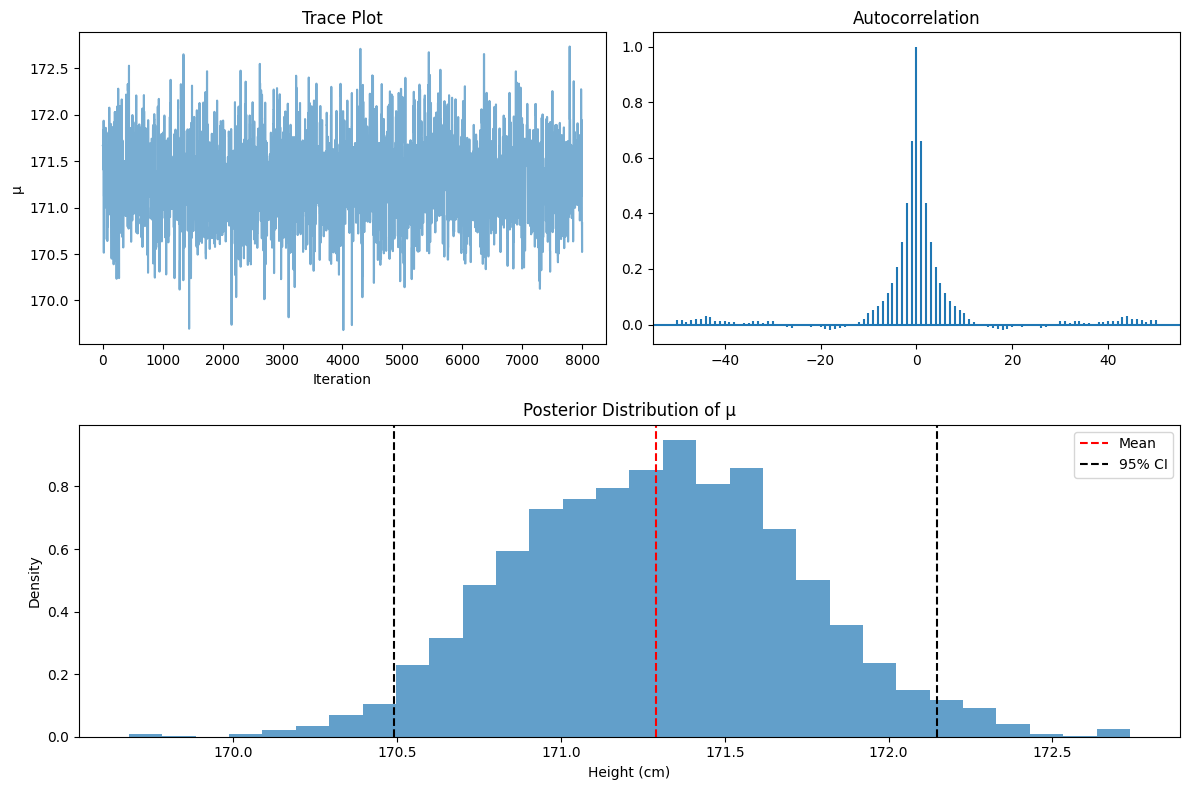

In [2]:
# Step 1: Generate synthetic data (true μ = 172)
np.random.seed(42)
data = np.random.normal(loc=172, scale=3, size=50)  # σ=3 → σ²=9

# Step 2: Define unnormalized posterior
def log_posterior(mu, data, prior_mean=170, prior_var=25, data_var=9):
    log_likelihood = -0.5 * np.sum((data - mu)**2) / data_var
    log_prior = -0.5 * (mu - prior_mean)**2 / prior_var
    return log_likelihood + log_prior  # log scale for numerical stability

# Step 3: Metropolis-Hastings
def metropolis_hastings(data, n_iter=10000, step_size=1.5):
    samples = [170]  # Start at prior mean
    current = 170
    
    for _ in range(n_iter):
        # Propose new μ (symmetric proposal: Normal)
        proposal = current + np.random.normal(0, step_size)
        
        # Compute log acceptance ratio
        log_alpha = log_posterior(proposal, data) - log_posterior(current, data)
        
        # Accept/reject
        if np.log(np.random.rand()) < log_alpha:
            current = proposal
        samples.append(current)
    
    return np.array(samples)

# Run MCMC
samples = metropolis_hastings(data, n_iter=10000, step_size=1.5)

# Discard burn-in (first 20%)
burn_in = int(0.2 * len(samples))
posterior_samples = samples[burn_in:]

# Step 4: Results
print(f"Posterior mean: {np.mean(posterior_samples):.2f} cm")
print(f"95% Credible Interval: [{np.percentile(posterior_samples, 2.5):.2f}, "
      f"{np.percentile(posterior_samples, 97.5):.2f}]")

# Step 5: Diagnostics
plt.figure(figsize=(12, 8))

# Trace plot
plt.subplot(2, 2, 1)
plt.plot(posterior_samples, alpha=0.6)
plt.title("Trace Plot")
plt.xlabel("Iteration")
plt.ylabel("μ")

# Autocorrelation
plt.subplot(2, 2, 2)
plt.acorr(posterior_samples - np.mean(posterior_samples), maxlags=50)
plt.title("Autocorrelation")

# Posterior histogram
plt.subplot(2, 1, 2)
plt.hist(posterior_samples, bins=30, density=True, alpha=0.7)
plt.axvline(np.mean(posterior_samples), color='r', linestyle='dashed', label='Mean')
plt.axvline(np.percentile(posterior_samples, 2.5), color='k', linestyle='dashed', label='95% CI')
plt.axvline(np.percentile(posterior_samples, 97.5), color='k', linestyle='dashed')
plt.title("Posterior Distribution of μ")
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()